In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv("/content/student_performance_prediction.csv")
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [8]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [9]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [10]:
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [11]:
df.isnull().count()

,0
Student ID,40000
Study Hours per Week,40000
Attendance Rate,40000
Previous Grades,40000
Participation in Extracurricular Activities,40000
Parent Education Level,40000
Passed,40000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
# Encoding Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
# Splitting into features and target
X = df.drop(columns=['Passed'])
y = df['Passed']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Classification Model
print("\nClassification Task:")
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred_class = classifier.predict(X_test)


Classification Task:


In [19]:
# Classification Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Accuracy: 0.47625
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.51      0.50      3794
           1       0.47      0.49      0.48      3788
           2       0.00      0.00      0.00       418

    accuracy                           0.48      8000
   macro avg       0.32      0.33      0.33      8000
weighted avg       0.45      0.48      0.46      8000



In [20]:
# Regression Model
print("\nRegression Task:")
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)


Regression Task:


In [21]:
# Regression Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))

Mean Squared Error: 0.3635292125
R² Score: -0.04337691868341276


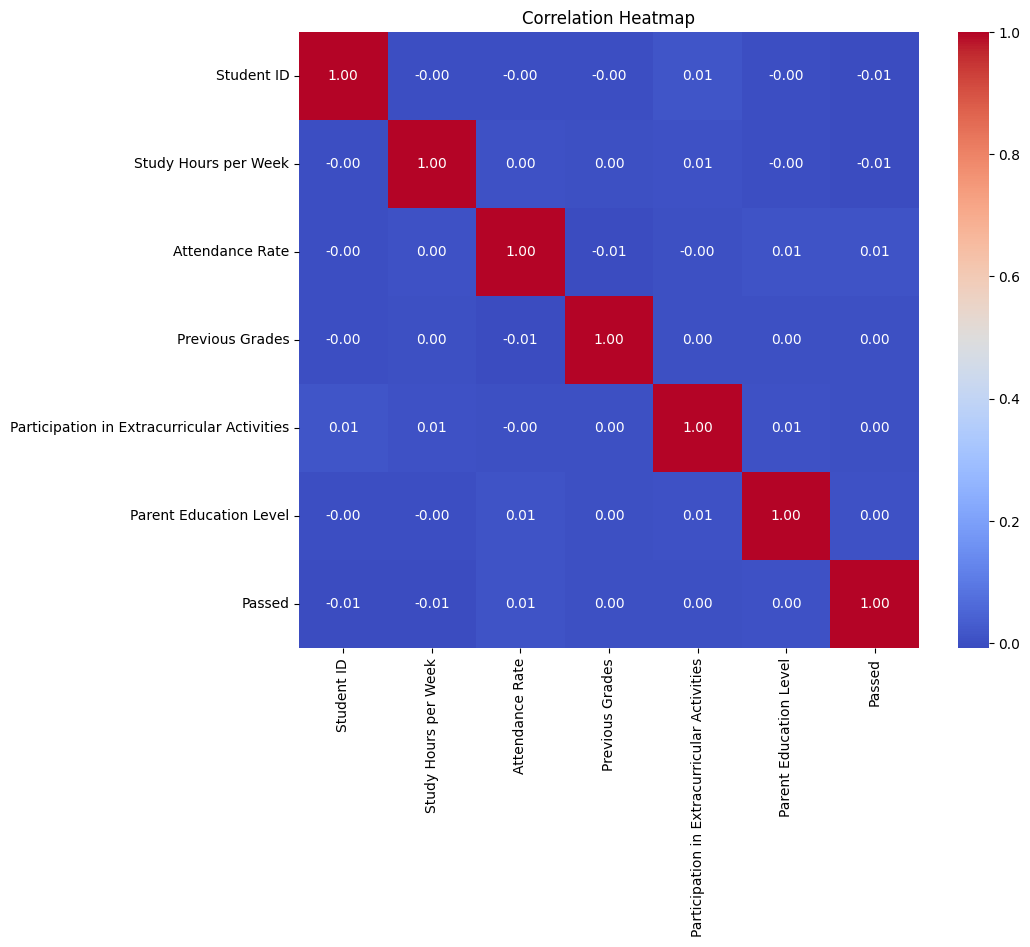

In [23]:
# Display correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()